# 6. Generate 2-D visualization of your posed point cloud. 

The following code creates a 2D visualization for you to overlay on your original image using opencv. 

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2
import trimesh
%matplotlib inline

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
rgb_image_path = "C:\\Users\\gusta\\Desktop\\ITESM_Desktop\\maestria\\tesis\\TercerSemestre\\realTimeICP\\refined_one_img_process\\resources\\ImagesAndPointClouds\\color\\00000.jpg"
depth_image_path = "C:\\Users\\gusta\\Desktop\\ITESM_Desktop\\maestria\\tesis\\TercerSemestre\\realTimeICP\\refined_one_img_process\\resources\\ImagesAndPointClouds\\depth\\00000.png"

rgb_image =   cv2.imread(rgb_image_path)
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED) 

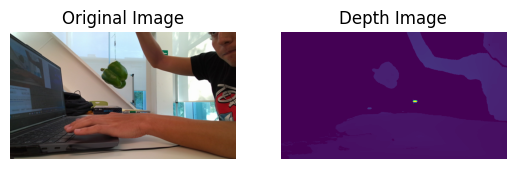

In [3]:
# Display images using matplotlib
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Depth Image")
plt.imshow(depth_image)
plt.axis("off")
plt.show()

In [4]:
# Filtering by color (HSV): 
lower_green = np.array([18, 7, 30])
upper_green = np.array([84, 255, 138])
# hsv image
hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
# color mask 
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

In [5]:
result = cv2.bitwise_and(rgb_image, rgb_image, mask=green_mask)

In [6]:
lower_depth_bound = 350
upper_depth_bound = 525
depth_mask = cv2.inRange(depth_image, 350, 525)

In [7]:
combined_mask = cv2.bitwise_and(green_mask, depth_mask)

In [8]:
# Compute connected components
num_lablels, labels, stats, centroids = cv2.connectedComponentsWithStats(combined_mask, 8, cv2.CV_32S)
# Find largest component
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
# Create a Mask of the largest component
cleaned_mask = np.where(labels == largest_label, 255, 0).astype('uint8')

In [9]:
result_rgb = cv2.bitwise_and(rgb_image, rgb_image, mask=cleaned_mask)
result_depth = cv2.bitwise_and(depth_image, depth_image, mask= cleaned_mask)

In [10]:
# Dimensions of the mask: 
x, y, w, h = cv2.boundingRect(cleaned_mask)

In [11]:
# Load and resize overlay image
two_d_pc_path = "C:\\Users\\gusta\\Desktop\\ITESM_Desktop\\maestria\\tesis\\TercerSemestre\\realTimeICP\\refined_one_img_process\\results\\two_d_pc\\2d_pc.png"
overlay_img = cv2.imread(two_d_pc_path, cv2.IMREAD_UNCHANGED)
overlay_img_resized = cv2.resize(overlay_img, (w, h))


In [12]:
alpha = overlay_img_resized[:, :, 3]  # Get the alpha channel
overlay_rgb = overlay_img_resized[:, :, :3]  # Get the RGB channels

alpha_mask = overlay_img_resized[:, :, 3] / 255.0
beta_mask = 1.0 - alpha_mask

roi = rgb_image[y:y+h, x:x+w]  # Region of interest in the original image

roi_b, roi_g, roi_r = cv2.split(roi)
overlay_b, overlay_g, overlay_r = cv2.split(overlay_rgb)

b_channel = (alpha_mask * overlay_b) + (beta_mask * roi_b)
g_channel = (alpha_mask * overlay_g) + (beta_mask * roi_g)
r_channel = (alpha_mask * overlay_r) + (beta_mask * roi_r)

In [13]:
img_overlay = cv2.merge([b_channel, g_channel, r_channel]).astype(np.uint8)

In [14]:
rgb_image[y:y+h, x:x+w] = img_overlay

In [15]:
cv2.imshow('Overlay Image', rgb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
result_path = "C:\\Users\\gusta\\Desktop\\ITESM_Desktop\\maestria\\tesis\\TercerSemestre\\realTimeICP\\refined_one_img_process\\results\\output_2d_result\\output_cloud_og.png"
cv2.imwrite(result_path, rgb_image)

True